# import

In [771]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler

import re


pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler

import re


pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [772]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [773]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# Подключаем данные

In [774]:
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [775]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [776]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [777]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [778]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [779]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [780]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [781]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

****EDA****

In [782]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

К категориальным признак относятся:<br/>
* Price Range<br/>
* City<br/>
* Cuisine Style<br/>
* Reviews<br/>
* Restaurant_id<br/>
* ID_TA<br/>
* URL_TA<br/>

К количественным признакам:
* Ranking
* Rating
* Number of Reviews

In [783]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
31335,id_10542,Paris,"['Mediterranean', 'European', 'Spanish']",10544.0,$$ - $$$,368.0,"[['Tasty food, but unable to give more positi....",/Restaurant_Review-g187147-d815672-Reviews-Cas...,d815672,1,3.0
41660,id_2211,Berlin,['Sushi'],2213.0,$$ - $$$,26.0,"[['Delicious Japanese food', 'Excellent Sushi ...",/Restaurant_Review-g187323-d5507185-Reviews-Ki...,d5507185,1,4.0
47679,id_3108,Rome,"['Italian', 'Pizza']",3109.0,$$ - $$$,407.0,"[['Fred Flintstone would be proud.', 'Michelin...",/Restaurant_Review-g187791-d3756319-Reviews-Os...,d3756319,1,4.0
1215,id_1215,Munich,"['Italian', 'Mediterranean', 'Vegetarian Frien...",754.0,$$ - $$$,40.0,"[['Delicious', 'One of the best in munich'], [...",/Restaurant_Review-g187309-d2481127-Reviews-Os...,d2481127,0,0.0
48715,id_6479,Barcelona,"['Mediterranean', 'Spanish']",6480.0,$$ - $$$,22.0,"[['Decent food', 'Maybe the tapas are better']...",/Restaurant_Review-g187497-d2023511-Reviews-Re...,d2023511,1,4.0


Признаки, состоящие из нескольких слов

In [784]:
data['Cuisine Style'][1]

"['European', 'Scandinavian', 'Gluten Free Options', 'Vegetarian Friendly', 'Vegan Options']"

In [785]:
data['URL_TA'][1]

'/Restaurant_Review-g189934-d6674944-Reviews-Ravintola_Kolmon3n-Helsinki_Uusimaa.html'

In [786]:
data['Reviews'][1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

## Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

# Количество и процент пропусков по каждому признаку

In [787]:

nan_df = pd.DataFrame(data.isna().sum(), columns=['Количество'])

nan_df['%'] = nan_df['Количество'].apply(lambda x: round((x/len(data))*100, 0))
print(nan_df)

                   Количество     %
Restaurant_id               0   0.0
City                        0   0.0
Cuisine Style           11590  23.0
Ranking                     0   0.0
Price Range             17361  35.0
Number of Reviews        3200   6.0
Reviews                     2   0.0
URL_TA                      0   0.0
ID_TA                       0   0.0
sample                      0   0.0
Rating                      0   0.0


Откуда следует, что пропуски имеют только 4 признака из 10


# Проверим какое максимальное количество пропусков в строке

In [788]:

Count_rows = data.apply(lambda x: sum(x.isnull()), axis=1).value_counts()
percent_nans = round(pd.Series(
    Count_rows.index/data.shape[1]*100)).sort_values(ascending=False).astype(str)+' %'
misses = max(data.apply(lambda x: sum(x.isnull()), axis=1))/ data.shape[1]
print('Максимум незаполненных строк в датафрейме:', round(misses*100, 2), "%")
pd.DataFrame({'Количество случаев строке': Count_rows,
              'Количество пропусков в строке': Count_rows.index,
              'Процент незаполненных значений в строке': percent_nans}).sort_values('Количество пропусков в строке', ascending=False).reset_index().drop('index', axis=1)

Максимум незаполненных строк в датафрейме: 36.36 %


,Количество случаев строке,Количество пропусков в строке,Процент незаполненных значений в строке
0,1,4,36.0 %
1,1710,3,27.0 %
2,5341,2,18.0 %
3,10839,1,9.0 %
4,32109,0,0.0 %


# Проверим наличие дубликатов по всем строкам

In [789]:
if len(data)>len(data.drop_duplicates()):
    print('Дубликаты есть')
    display(data[data.duplicated()])
else:
    print('Дубликатов нет')



Дубликатов нет


# Обозначим количество пропусков в новых столбцах

In [790]:
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')
data['Price_Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')
data['Cuisine_Style_isNAN'] = pd.isna(data['Cuisine Style']).astype('uint8')

#  Приведем в порядок колонку Restaurant_id 

In [791]:
data.Restaurant_id = data.Restaurant_id.apply(lambda x: x[3:])
data.Restaurant_id = [int(x) for x in data.Restaurant_id]

# Приведем к числовому формату значение ID в ID_TA

In [792]:
data.ID_TA = data.ID_TA.apply(lambda x: x[1:])
data.ID_TA = [int(x) for x in data.ID_TA]

# Проработаем колонку Cuisine Style

In [793]:
data['Cuisine Style'] = data['Cuisine Style'].astype(str).apply(lambda x: None if x.strip() == '' else x)
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: x.replace("['", '').replace("', '", ',').replace("']", ''))

# Название ресторана из URL

In [794]:
data['URL_TA'] = data['URL_TA'].astype(str).apply(lambda x: None if x.strip() == '' else x)
data['URL_TA'] = data['URL_TA'].apply(lambda x: x.replace("/Restaurant_Review-", '').replace(".html", '').replace('-Reviews-', '|'))
data_m = data['URL_TA'].str.split('|', expand=True)
data['restaurant'] = data_m[1]

#  РАБОТА С ЧИСЛОВЫМИ ПРИЗНАКАМИ #

# 1. Количество отзывов (Number of Reviews)

In [795]:
data['Number of Reviews'].describe()


count    46800.000000
mean       124.471197
std        294.114345
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: Number of Reviews, dtype: float64

Text(0.5, 0, 'Количество отзывов')

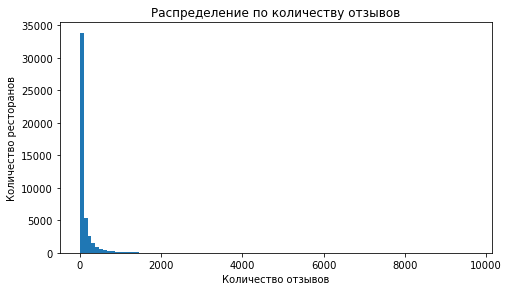

In [796]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 0.8])
axes.hist(data['Number of Reviews'], bins=100)
axes.set_title('Распределение по количеству отзывов')
axes.set_ylabel('Количество ресторанов')
axes.set_xlabel('Количество отзывов')

# 1. 1 Определяем моду отзывов по городам и заполняем ими пропуски

In [797]:
data['Number of Reviews'] = data.groupby('City')['Number of Reviews'].transform(
    lambda x: x.fillna(round(x.mode(), 0)))

In [798]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant_id            50000 non-null  int64  
 1   City                     50000 non-null  object 
 2   Cuisine Style            50000 non-null  object 
 3   Ranking                  50000 non-null  float64
 4   Price Range              32639 non-null  object 
 5   Number of Reviews        46800 non-null  float64
 6   Reviews                  49998 non-null  object 
 7   URL_TA                   50000 non-null  object 
 8   ID_TA                    50000 non-null  int64  
 9   sample                   50000 non-null  int64  
 10  Rating                   50000 non-null  float64
 11  Number_of_Reviews_isNAN  50000 non-null  uint8  
 12  Price_Range_isNAN        50000 non-null  uint8  
 13  Cuisine_Style_isNAN      50000 non-null  uint8  
 14  restaurant            

# 2. Место ресторана среди ресторанов своего города (Ranking)

<AxesSubplot:>

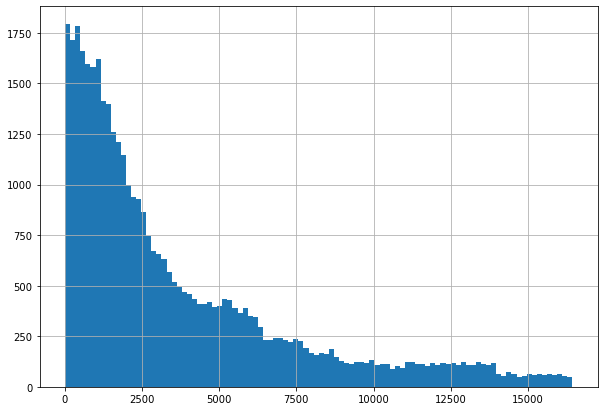

In [799]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

<AxesSubplot:>

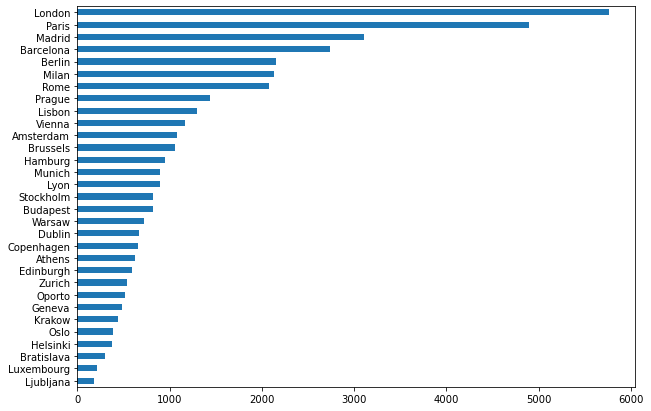

In [800]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

<AxesSubplot:>

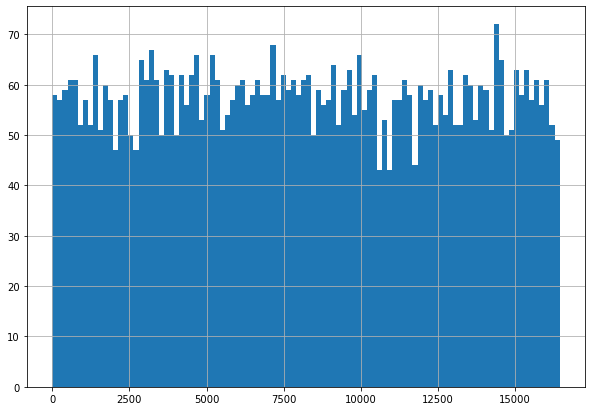

In [801]:
df_train['Ranking'][df_train['City'] == 'London'].hist(bins=100)

Лидеры в топ 10 городов

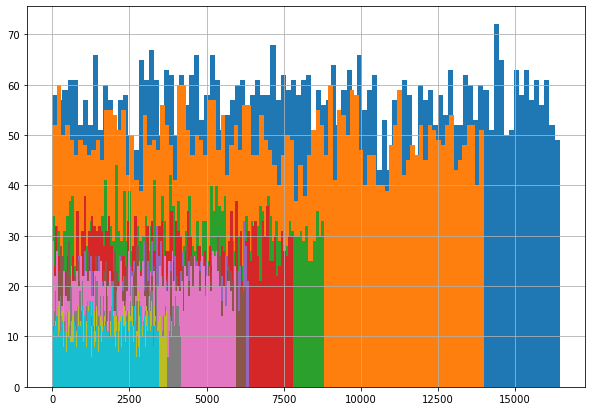

In [802]:
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Проведем нормализацию признака Ranking в пределах каждого города

In [803]:
means = data.groupby('City')['Ranking'].mean()
std = data.groupby('City')['Ranking'].std()
data['Ranking'] = (data.Ranking - data.City.map(means))/(data.City.map(std))

# 3. Целевая переменная (Rating)

<AxesSubplot:>

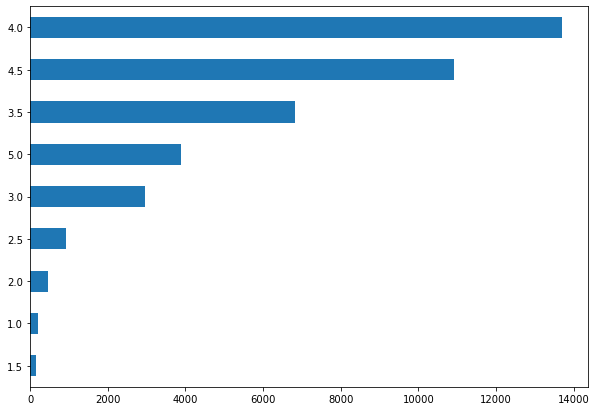

In [804]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

Целевая переменная принимает дискретные значения с шагом 0.5

<AxesSubplot:>

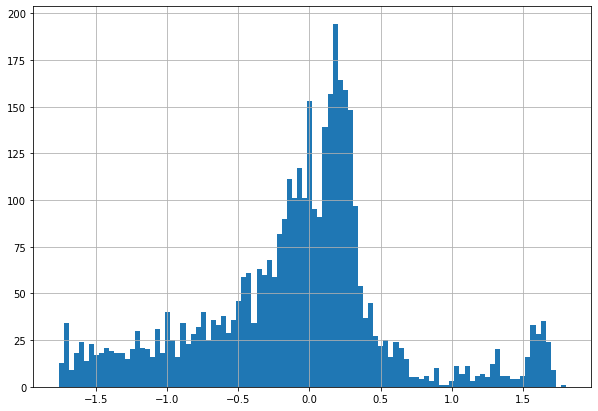

In [805]:
data['Ranking'][data['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

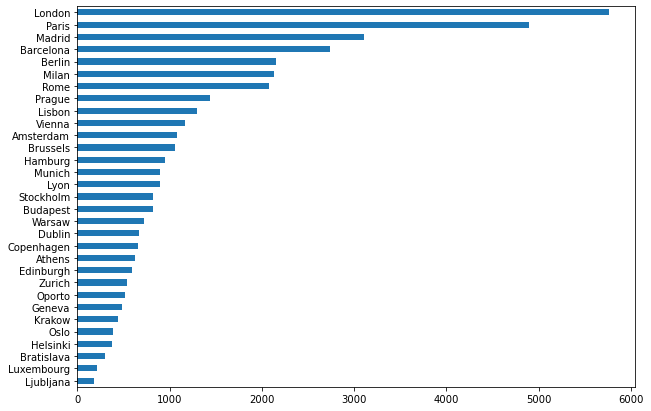

In [806]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

Лондон в лидерах)

# КАТЕГОРИАЛЬНЫЕ (НОМИНАТИВНЫЕ) ПРИЗНАКИ

# 1. Диапазон цен в ресторане (Price Range)

In [807]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

Кодируем признак с помощью словаря

In [808]:
price_dict = {'$': 1, '$$ - $$$': 2, '$$$$': 3}
data['Price Range'] = data['Price Range'].replace(to_replace=price_dict)

Заменяем пропуски наиболее часто встречающейся категорией

In [809]:
mode_PR = data['Price Range'].mode()
data['Price Range'] = data['Price Range'].fillna('mode_PR')


# 2. Данные о двух отзывах (Reviews)

In [810]:
data['Reviews'].value_counts()

[[], []]                                                                                                                              8112
[['Good restaurant for one meal.', 'Olive Garden Restaurant Warsaw. Food very...'], ['04/20/2015', '07/15/2013']]                        2
[['Whenever in Madrid, we never miss this gem...', 'Underrated sushi restaurant with very good...'], ['04/11/2017', '12/02/2016']]       2
[['Very average food. Over average prices.', 'great food with great service!'], ['11/17/2017', '08/17/2017']]                            2
[['Delicious soup', 'My weekly treat'], ['03/19/2017', '07/30/2017']]                                                                    2
                                                                                                                                      ... 
[['Amazing food and service!', 'Awesome little bar/restaurant'], ['11/01/2017', '07/23/2017']]                                           1
[['Great doughnuts'], ['10/

Обработка колонки Reviews. Замена пустых значений, значением "none".Отсутствие отзывов зафиксируем в отдельную колонку

In [811]:
data['Reviews'] = data.Reviews.apply(lambda x: None if x == '[[], []]' else x)
data['Review_isNAN'] = pd.isna(data['Reviews']).astype('uint8')

Разделим на 2 колонки: содержащий отзывы и содержащий даты

In [812]:
data[['reviews_text', 'reviews_date']
     ] = data['Reviews'].str.split("'],", expand=True)

Выделение даты

In [813]:
data['reviews_date'] = data.reviews_date.dropna().astype(str).apply(
    lambda x: None if pd.isnull(x) else re.compile('\d*/\d*/\d*').findall(x))

Функция для формирования списка даты в определенном формате:

In [814]:
def to_time(line):
    line = [pd.to_datetime(item) for item in line]
    return line
data['reviews_date'] = data.reviews_date.dropna().apply(to_time)

Функция для определения количества дней, которые прошли между последними отзывами:

In [815]:
def find_delta(line):
    return (max(line) - min(line))


data['delta_reviews_date'] = data['reviews_date'].dropna().apply(find_delta).dt.days

Замена пропусков нулевым значением

In [816]:
data['delta_reviews_date'] = data['delta_reviews_date'].fillna(0)

Приведение символов в текстовой колонке (reviews_text) к нижнему регистру

In [817]:
data['reviews_text'] = data.reviews_text.apply(
    lambda x: x if pd.isnull(x) else x.lower())

Выделение из текста слов, которые имеют более двух символов

In [818]:
data['reviews_text_1'] = data.reviews_text.astype(str).apply(
    lambda x: re.compile('[a-z][a-z]\w+').findall(x))

Определение наиболее встречающихся в отзывах выражений

In [819]:
word_list = pd.DataFrame(data.reviews_text_1.dropna(
).tolist()).stack().value_counts().reset_index()
word_list[:40]

,index,0
0,food,13166
1,good,11780
2,great,10628
3,and,9765
4,one,8755
5,the,6186
6,nice,5702
7,place,5166
8,for,4803
9,service,4383


Создание списка слов, имеющих эмоциональную окраску для отзыва

In [820]:
words_list = ['not', 'good', 'nice', 'great', 'very', 'best', 'excellent',
              'delicious', 'friendly', 'lovely', 'amazing', 'tasty', 'fantastic', 'average']

Функция, определяющая наиболее часто встречающиеся слова

In [821]:
def check_words(raw):
    line = []
    for item in raw:
        if item in words_list:
            line.append(item)
        else:
            continue
    return line
data['reviews_text_1'] = data['reviews_text_1'].apply(check_words)

# 3. Город расположения ресторана (City)

Использование внешних источников данных для обогащения датасета

In [822]:
df_cities = pd.read_csv('worldcities.csv')
df_cities

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...
15488,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
15489,Cheremoshna,Cheremoshna,51.3894,30.0989,Ukraine,UA,UKR,Kyyivs’ka Oblast’,NaN,0.0,1804043438
15490,Ambarchik,Ambarchik,69.6510,162.3336,Russia,RU,RUS,Sakha (Yakutiya),NaN,0.0,1643739159
15491,Nordvik,Nordvik,74.0165,111.5100,Russia,RU,RUS,Krasnoyarskiy Kray,NaN,0.0,1643587468


Исправим назвние 'Porto' к тому, что используется в data - 'Oporto'

In [823]:
df_cities['city_ascii'] = df_cities.city_ascii.apply(
    lambda x: 'Oporto' if x == 'Porto' else x)

Создадим словарь из данных "df_cities", где ключ - город, значение - страна

In [824]:
df_cities_1 = df_cities.drop(
    ['city', 'lat', 'lng', 'iso2', 'iso3', 'admin_name', 'capital', 'population', 'id'], axis=1)
df_countries = df_cities_1[(df_cities_1['country'] != 'United States') & (
    df_cities_1['country'] != 'Canada') & (df_cities_1['country'] != 'Venezuela')]
df_countries.set_index("city_ascii", drop=True, inplace=True)
country_dict = df_countries.to_dict()
country_dict_n = country_dict['country']

Добавление нового признака "Country" (страна)

In [825]:
data['Country'] = data['City'].apply(lambda x: country_dict_n[x])

Создание словаря из данных "df_cities", где ключ - город, значение - размер населения

In [826]:
df_population = df_cities[(df_cities['country'] != 'United States') & (
    df_cities['country'] != 'Canada')]
df_population = df_population.drop(
    ['city', 'lat', 'lng', 'iso2', 'iso3', 'admin_name', 'capital', 'country', 'id'], axis=1)

df_population.set_index("city_ascii", drop=True, inplace=True)
population_dict = df_population.to_dict()
population_dict_n = population_dict['population']

Добавление признака "Population" - население города

In [827]:
data['Population'] = data['City'].apply(lambda x: population_dict_n[x])

Создание сета из названия столиц, используя данные "df_cities"

In [828]:
capitals = set(df_cities[df_cities['capital'] == 'primary']['city_ascii'])

Функция, определяющая является город столицей или нет

In [829]:
def capital_check(city):
    if city in capitals:
        return 'capital' 
    return 'non_capital'

Добавление колонки, с признаком столица

In [830]:
data['Сity_status'] = data['City'].apply(capital_check)

# 4. Блюда кухни (Cuisine style)

Переводим строки к списку

In [831]:
data['Cuisine Style'] = data['Cuisine Style'].astype(str).apply(
    lambda x: str(x).replace('[', '').replace(']', '').replace("'", "").strip())

data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x:  None if x == 'nan' else [
    info.strip() for info in str(x).split(',')])

Список 10 самых популярных кухонь

In [832]:
cuisine_list = pd.DataFrame(data['Cuisine Style'].dropna(
).tolist()).stack().value_counts().reset_index()
top_cuisine = cuisine_list['index'][:10].tolist()

Присваеваем "not_define" отсутствующим значениям

In [833]:
data['Cuisine Style'] = data['Cuisine Style'].apply(
    lambda x: 'not_define' if x == None else x)

Добавляем колонку "Cuisine_qnt", где содержится количество типов кухонь по каждому ресторану

In [834]:
data['cuisine_qnt'] = data['Cuisine Style'].apply(lambda x: len(x))

Функция, оставляющая только популярную кухню

In [835]:
def check_cousine(raw):
    line = []
    top_list = ['Vegetarian Friendly', 'European', 'Mediterranean',
                'Italian', 'Vegan Options', 'Gluten Free Options', 'Bar', 'French', 'Asian']
    for item in raw:
        if item.strip() == 'not_define':
            line.append('not_define')
        elif item.strip() in top_cuisine:
            line.append(item.strip())
        else:
            line.append('other_cuisine')
    return line


data['Cuisine Style'] = data['Cuisine Style'].apply(check_cousine)

Добавляем колонку тип кухни

In [836]:
mlb = MultiLabelBinarizer()
data = data.join(pd.DataFrame(mlb.fit_transform(
    data.pop('Cuisine Style')), index=data.index, columns=mlb.classes_))

# Кодирование категориальных признаков с помощью подхода One-Hot-Encoding

In [837]:
mlb = MultiLabelBinarizer()
data = data.join(pd.DataFrame(mlb.fit_transform(
    data.pop('reviews_text_1')), index=data.index, columns=mlb.classes_))

In [838]:
data = pd.get_dummies(data, columns=['City', 'Country', 'Сity_status'])

# Корреляционный анализ признаков

<AxesSubplot:>

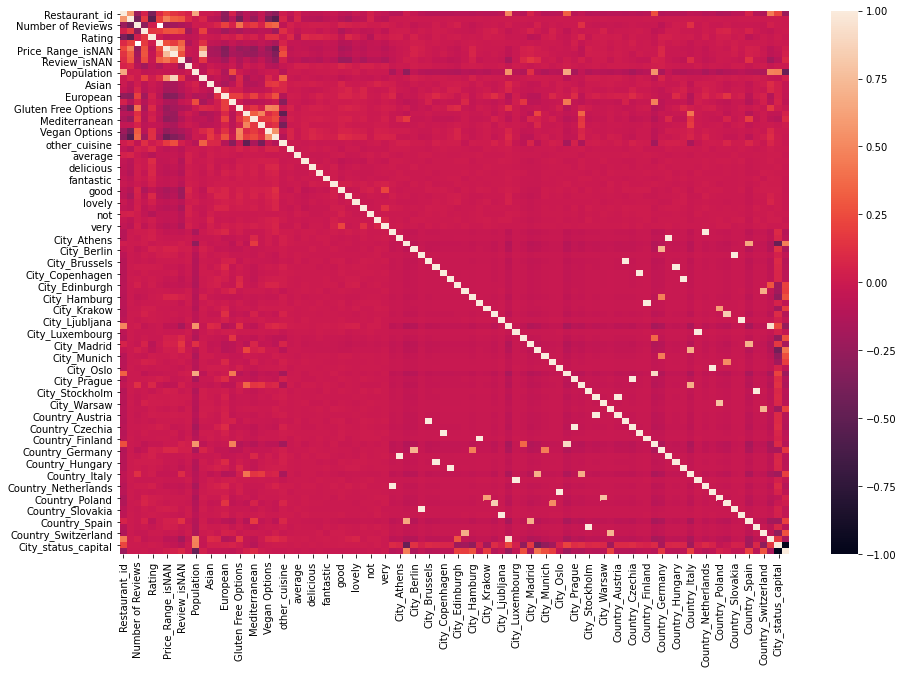

In [839]:
data_corr = data[data['sample'] == 1]
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data_corr.drop('sample', axis=1).corr())

# Удаление оставшихся категориальных признаков

In [840]:
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis=1, inplace=True)

Функция нормализации данных (не включая : 'Rating','sample')

In [841]:
def StandardScaler_column(d_col):
    scaler = StandardScaler()
    scaler.fit(data[[d_col]])
    return scaler.transform(data[[d_col]])
for i in list(data.columns):
    if i not in ['Rating', 'sample', 'Ranking']:
        data[i] = StandardScaler_column(i)
        if len(data[data[i].isna()]) < len(data):
            data[i] = data[i].fillna(0)

In [842]:
df_preproc = data
df_preproc.head(10)

,Restaurant_id,Ranking,Number of Reviews,ID_TA,sample,Rating,Number_of_Reviews_isNAN,Price_Range_isNAN,Cuisine_Style_isNAN,Review_isNAN,delta_reviews_date,Population,cuisine_qnt,Asian,Bar,European,French,Gluten Free Options,Italian,Mediterranean,Pizza,Vegan Options,Vegetarian Friendly,other_cuisine,amazing,...,City_Zurich,Country_Austria,Country_Belgium,Country_Czechia,Country_Denmark,Country_Finland,Country_France,Country_Germany,Country_Greece,Country_Hungary,Country_Ireland,Country_Italy,Country_Luxembourg,Country_Netherlands,Country_Norway,Country_Poland,Country_Portugal,Country_Slovakia,Country_Slovenia,Country_Spain,Country_Sweden,Country_Switzerland,Country_United Kingdom,Сity_status_capital,Сity_status_non_capital
0,-1.094732,1.491224,-0.409611,1.130877,0,0.0,-0.261488,-0.729321,-0.549313,2.272045,-0.508835,1.742102,-0.818705,-0.286222,3.348581,-0.579229,-0.293680,-0.340144,-0.417874,-0.430576,-0.274436,-0.358135,-0.624259,0.472104,-0.187494,...,-0.117857,-0.172388,-0.164284,-0.194136,-0.129046,-0.097934,2.431420,-0.334665,-0.125557,-0.144380,-0.130401,-0.343719,-0.072717,-0.167971,-0.099278,-0.17459,-0.219035,-0.087511,-0.066782,-0.410418,-0.145244,-0.161763,-0.434421,0.585418,-0.585418
1,-1.094454,-1.404530,-0.093404,0.097212,0,0.0,-0.261488,-0.729321,-0.549313,-0.440132,-0.321521,-0.882033,0.087102,-0.286222,-0.298634,1.726434,-0.293680,2.939932,-0.417874,-0.430576,-0.274436,2.792243,1.601899,0.472104,-0.187494,...,-0.117857,-0.172388,-0.164284,-0.194136,-0.129046,10.210933,-0.411282,-0.334665,-0.125557,-0.144380,-0.130401,-0.343719,-0.072717,-0.167971,-0.099278,-0.17459,-0.219035,-0.087511,-0.066782,-0.410418,-0.145244,-0.161763,-0.434421,0.585418,-0.585418
2,-1.094176,-0.146058,-0.328009,1.735727,0,0.0,-0.261488,-0.729321,-0.549313,-0.440132,-0.397459,-1.064171,-1.120641,-0.286222,-0.298634,-0.579229,-0.293680,-0.340144,-0.417874,-0.430576,-0.274436,-0.358135,1.601899,-2.118175,-0.187494,...,-0.117857,-0.172388,-0.164284,-0.194136,-0.129046,-0.097934,-0.411282,-0.334665,-0.125557,-0.144380,-0.130401,-0.343719,-0.072717,-0.167971,-0.099278,-0.17459,-0.219035,-0.087511,-0.066782,-0.410418,-0.145244,-0.161763,2.301916,-1.708181,1.708181
3,-1.093898,-1.376113,0.263604,-1.424489,0,0.0,-0.261488,-0.729321,-0.549313,-0.440132,-0.437959,1.342913,0.087102,-0.286222,-0.298634,1.726434,-0.293680,2.939932,2.393065,2.322469,-0.274436,-0.358135,1.601899,-2.118175,-0.187494,...,-0.117857,-0.172388,-0.164284,-0.194136,-0.129046,-0.097934,-0.411282,-0.334665,-0.125557,-0.144380,-0.130401,-0.343719,-0.072717,-0.167971,-0.099278,-0.17459,-0.219035,-0.087511,-0.066782,-0.410418,-0.145244,-0.161763,2.301916,0.585418,-0.585418
4,-1.093620,-1.673120,0.127601,-1.314842,0,0.0,-0.261488,-0.729321,-0.549313,-0.440132,-0.432897,-1.088424,0.389038,-0.286222,-0.298634,1.726434,-0.293680,2.939932,2.393065,2.322469,-0.274436,-0.358135,1.601899,0.472104,-0.187494,...,-0.117857,-0.172388,-0.164284,-0.194136,-0.129046,-0.097934,-0.411282,-0.334665,-0.125557,-0.144380,-0.130401,-0.343719,-0.072717,-0.167971,-0.099278,-0.17459,-0.219035,11.427115,-0.066782,-0.410418,-0.145244,-0.161763,-0.434421,0.585418,-0.585418
5,-1.093342,-0.456829,-0.341610,0.550002,0,0.0,-0.261488,-0.729321,-0.549313,-0.440132,-0.483522,1.742102,-0.516769,-0.286222,-0.298634,-0.579229,3.405064,-0.340144,-0.417874,-0.430576,-0.274436,-0.358135,-0.624259,0.472104,-0.187494,...,-0.117857,-0.172388,-0.164284,-0.194136,-0.129046,-0.097934,2.431420,-0.334665,-0.125557,-0.144380,-0.130401,-0.343719,-0.072717,-0.167971,-0.099278,-0.17459,-0.219035,-0.087511,-0.066782,-0.410418,-0.145244,-0.161763,-0.434421,0.585418,-0.585418
6,-1.093064,1.715451,-0.416411,0.626215,0,0.0,-0.261488,-0.729321,-0.549313,2.272045,-0.508835,-0.375359,-0.818705,-0.286222,-0.298634,1.726434,-0.293680,-0.340144,-0.417874,-0.430576,-0.274436,-0.358135,-0.624259,0.472104,-0.187494,...,-0.117857,-0.172388,-0.164284,-0.194136,-0.129046,-0.097934,-0.411282,-0.334665,-0.125557,-0.144380,-0.130401,-0.343719,-0.072717,

In [843]:
df_preproc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 93 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant_id            50000 non-null  float64
 1   Ranking                  50000 non-null  float64
 2   Number of Reviews        50000 non-null  float64
 3   ID_TA                    50000 non-null  float64
 4   sample                   50000 non-null  int64  
 5   Rating                   50000 non-null  float64
 6   Number_of_Reviews_isNAN  50000 non-null  float64
 7   Price_Range_isNAN        50000 non-null  float64
 8   Cuisine_Style_isNAN      50000 non-null  float64
 9   Review_isNAN             50000 non-null  float64
 10  delta_reviews_date       50000 non-null  float64
 11  Population               50000 non-null  float64
 12  cuisine_qnt              50000 non-null  float64
 13  Asian                    50000 non-null  float64
 14  Bar                   

In [844]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

In [845]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED)

In [846]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 92), (40000, 92), (40000, 91), (32000, 91), (8000, 91))

# Model 
Сам ML

In [847]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [848]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [849]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [850]:
# Как стало известо в результате обработки целевой переменной, реальные рейтинги всегда кратны 0.5
# Напишем функцию соответствующей корректировки предсказанных рейтингов
def fine_rating_pred(rating_pred):
    if rating_pred <= 0.5:
        return 0.0
    if rating_pred <= 1.5:
        return 1.0
    if rating_pred <= 1.75:
        return 1.5
    if rating_pred <= 2.25:
        return 2.0
    if rating_pred <= 2.75:
        return 2.5
    if rating_pred <= 3.25:
        return 3.0
    if rating_pred <= 3.75:
        return 3.5
    if rating_pred <= 4.25:
        return 4.0
    if rating_pred <= 4.75:
        return 4.5
    return 5.0

In [851]:
# Используем округление
for i in range(len(y_pred)):
    y_pred[i] = fine_rating_pred(y_pred[i])

In [852]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.166875


<AxesSubplot:>

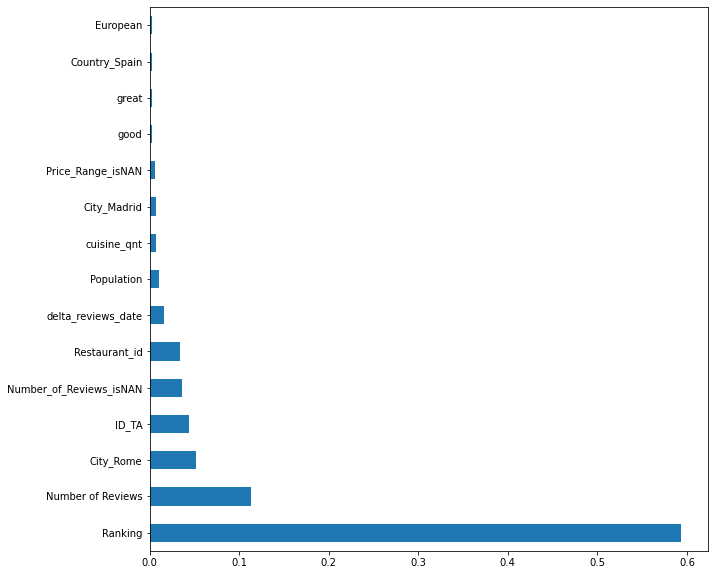

In [853]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [854]:
test_data.sample(10)

,Restaurant_id,Ranking,Number of Reviews,ID_TA,Rating,Number_of_Reviews_isNAN,Price_Range_isNAN,Cuisine_Style_isNAN,Review_isNAN,delta_reviews_date,Population,cuisine_qnt,Asian,Bar,European,French,Gluten Free Options,Italian,Mediterranean,Pizza,Vegan Options,Vegetarian Friendly,other_cuisine,amazing,average,...,City_Zurich,Country_Austria,Country_Belgium,Country_Czechia,Country_Denmark,Country_Finland,Country_France,Country_Germany,Country_Greece,Country_Hungary,Country_Ireland,Country_Italy,Country_Luxembourg,Country_Netherlands,Country_Norway,Country_Poland,Country_Portugal,Country_Slovakia,Country_Slovenia,Country_Spain,Country_Sweden,Country_Switzerland,Country_United Kingdom,Сity_status_capital,Сity_status_non_capital
3921,-0.004796,0.138851,-0.338209,0.553274,0.0,-0.261488,-0.729321,-0.549313,-0.440132,-0.397459,-0.907113,-0.214833,-0.286222,3.348581,1.726434,-0.29368,-0.340144,-0.417874,-0.430576,-0.274436,-0.358135,-0.624259,0.472104,-0.187494,-0.135388,...,-0.117857,-0.172388,-0.164284,-0.194136,-0.129046,-0.097934,-0.411282,-0.334665,-0.125557,-0.14438,-0.130401,-0.343719,-0.072717,5.953415,-0.099278,-0.17459,-0.219035,-0.087511,-0.066782,-0.410418,-0.145244,-0.161763,-0.434421,0.585418,-0.585418
2480,-0.405356,-1.185630,-0.266808,0.898352,0.0,-0.261488,-0.729321,-0.549313,-0.440132,0.037920,-0.837546,-0.214833,-0.286222,-0.298634,1.726434,-0.29368,-0.340144,2.393065,-0.430576,3.643838,-0.358135,1.601899,-2.118175,-0.187494,-0.135388,...,-0.117857,-0.172388,-0.164284,-0.194136,-0.129046,-0.097934,-0.411282,-0.334665,-0.125557,-0.14438,-0.130401,-0.343719,-0.072717,-0.167971,-0.099278,-0.17459,-0.219035,-0.087511,-0.066782,-0.410418,6.884963,-0.161763,-0.434421,0.585418,-0.585418
9995,1.683619,-0.804982,-0.328009,1.427856,0.0,-0.261488,-0.729321,-0.549313,-0.440132,0.108796,1.342913,-0.214833,-0.286222,-0.298634,-0.579229,-0.29368,-0.340144,-0.417874,-0.430576,-0.274436,-0.358135,1.601899,0.472104,-0.187494,-0.135388,...,-0.117857,-0.172388,-0.164284,-0.194136,-0.129046,-0.097934,-0.411282,-0.334665,-0.125557,-0.14438,-0.130401,-0.343719,-0.072717,-0.167971,-0.099278,-0.17459,-0.219035,-0.087511,-0.066782,-0.410418,-0.145244,-0.161763,2.301916,0.585418,-0.585418
3852,-0.023976,1.156882,0.178602,-1.050109,0.0,-0.261488,-0.729321,-0.549313,-0.440132,-0.240520,-0.198008,0.087102,-0.286222,-0.298634,1.726434,-0.29368,-0.340144,-0.417874,-0.430576,-0.274436,-0.358135,1.601899,0.472104,-0.187494,-0.135388,...,-0.117857,-0.172388,-0.164284,-0.194136,-0.129046,-0.097934,-0.411282,2.988062,-0.125557,-0.14438,-0.130401,-0.343719,-0.072717,-0.167971,-0.099278,-0.17459,-0.219035,-0.087511,-0.066782,-0.410418,-0.145244,-0.161763,-0.434421,0.585418,-0.585418
7623,1.024264,0.450942,-0.331409,-1.333485,0.0,-0.261488,1.371138,1.820457,-0.440132,-0.508835,-0.690351,1.596781,-0.286222,-0.298634,-0.579229,-0.29368,-0.340144,-0.417874,-0.430576,-0.274436,-0.358135,-0.624259,0.472104,-0.187494,-0.135388,...,-0.117857,-0.172388,-0.164284,-0.194136,-0.129046,-0.097934,-0.411282,2.988062,-0.125557,-0.14438,-0.130401,-0.343719,-0.072717,-0.167971,-0.099278,-0.17459,-0.219035,-0.087511,-0.066782,-0.410418,-0.145244,-0.161763,-0.434421,-1.708181,1.708181
7044,0.863317,1.420056,0.290804,-1.332217,0.0,-0.261488,-0.729321,-0.549313,-0.440132,0.048045,1.342913,-0.516769,3.493787,-0.298634,-0.579229,-0.29368,-0.340144,-0.417874,-0.430576,-0.274436,-0.358135,1.601899,0.472104,-0.187494,-0.135388,...,-0.117857,-0.172388,-0.164284,-0.194136,-0.129046,-0.097934,-0.411282,-0.334665,-0.125557,-0.14438,-0.130401,-0.343719,-0.072717,-0.167971,-0.099278,-0.17459,-0.219035,-0.087511,-0.066782,-0.410418,-0.145244,-0.161763,2.301916,0.585418,-0.585418
2389,-0.430652,-0.359905,-0.192006,0.185253,0.0,-0.261488,-0.729321,-0.549313,-0.440132,-0.422771,-1.064171,-0.818705,3.493787,-0.298634,-0.579229,-0.29368,-0.340144,-0.417874,-0.430576,-0.274436,-0.358135,-0.624259,0.472104,-0.187494,-0.135388,...,-0.117857,-0.172388,-0.164284,-0.194136,-0.129046,-0.097934,-0.4112

In [855]:
test_data = test_data.drop(['Rating'], axis=1)

In [856]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [857]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [858]:
predict_submission

array([3.24 , 4.2  , 4.17 , ..., 3.07 , 4.43 , 4.205])

In [859]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.240
1,id_1,4.200
2,id_2,4.170
3,id_3,4.245
4,id_4,4.395
5,id_5,4.385
6,id_6,3.660
7,id_7,3.185
8,id_8,4.270
9,id_9,4.550


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
